In [57]:
pip install pandas numpy matplotlib yfinance ta tensorflow

Note: you may need to restart the kernel to use updated packages.


In [58]:
import pandas as pd
import numpy as np
from ta import add_all_ta_features

# Load your dataset
data = pd.read_csv('NSE50.csv')

# Convert 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)  # Set the 'Date' column as the index

# Add technical indicators
data = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume=None)

# Drop rows with NaN values
data.dropna(inplace=True)

# Normalize the data
data = (data - data.mean()) / data.std()

# Prepare data for LSTM
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :])
        y.append(data[i + time_step, 0])  # Assuming we want to predict 'Close' price
    return np.array(X), np.array(y)

time_step = 10  # Number of time steps
X, y = create_dataset(data.values, time_step)

# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build and train the LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Make predictions
predicted_prices = model.predict(X_test)

# Visualize results
import matplotlib.pyplot as plt

plt.plot(y_test, label='True Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


C:\Users\prana\AppData\Local\Temp\ipykernel_23144\3309066372.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


KeyError: None

# Assistant
The selected code is:


In [72]:
import pandas as pd
import numpy as np
from ta import add_all_ta_features


Here's a step-by-step explanation of this code:

1. `import pandas as pd` - This line imports the Pandas library, which is a powerful data manipulation and analysis tool for Python. It is commonly used for handling structured data, such as data frames.

2. `import numpy as np` - This line imports the NumPy library, which is a fundamental package for numerical computing in Python. It provides support for arrays, matrices, and a variety of mathematical functions.

3. `from ta import add_all_ta_features` - This line imports the `add_all_ta_features` function from the `ta` (technical analysis) library. This function is used to add a comprehensive set of technical indicators to a DataFrame, which can be useful for financial data analysis and modeling, particularly in time series forecasting. 

Overall, this selected code sets up the necessary libraries for data manipulation and technical analysis, which will be used in the subsequent steps of the active cell code.

In [75]:
   import pandas as pd
   import numpy as np
   from ta import add_all_ta_features
   from sklearn.model_selection import train_test_split
   from tensorflow.keras.models import Sequential
   from tensorflow.keras.layers import LSTM, Dense, Dropout
   import matplotlib.pyplot as plt
   

In [77]:
data = pd.read_csv('NSE50.csv')

In [79]:
   data['Date'] = pd.to_datetime(data['Date'])
   data.set_index('Date', inplace=True)
   data = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume=None)
   data.dropna(inplace=True)
   data = (data - data.mean()) / data.std()  # Normalization
   

C:\Users\prana\AppData\Local\Temp\ipykernel_23144\3802922599.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


KeyError: None

In [ ]:
   data = pd.read_csv('NSE50.csv')
   

# Assistant
The selected code is:


In [83]:
import pandas as pd
import numpy as np
from ta import add_all_ta_features


Here's a step-by-step explanation of this code:

1. `import pandas as pd` - This line imports the Pandas library, which is a powerful data manipulation and analysis tool for Python. It is commonly used for handling structured data, such as data frames.

2. `import numpy as np` - This line imports the NumPy library, which is a fundamental package for numerical computing in Python. It provides support for arrays, matrices, and a variety of mathematical functions.

3. `from ta import add_all_ta_features` - This line imports the `add_all_ta_features` function from the `ta` (technical analysis) library. This function is used to add a comprehensive set of technical indicators to a DataFrame, which can be useful for financial data analysis and modeling, particularly in time series forecasting. 

Overall, this selected code sets up the necessary libraries for data manipulation and technical analysis, which will be used in the subsequent steps of the active cell code.

# User
so i want to create a model which will give me indices prediction

# Assistant
To create a model for predicting indices (like stock market indices), you can follow these general steps, which build upon the code you provided earlier. Here’s a brief outline of the process:

### Step-by-Step Guide to Create an Indices Prediction Model

1. **Import Libraries**:
   Ensure you have the necessary libraries imported, including Pandas, NumPy, TensorFlow/Keras, and any other libraries for data manipulation and visualization.

   

In [88]:
   import pandas as pd
   import numpy as np
   from ta import add_all_ta_features
   from sklearn.model_selection import train_test_split
   from tensorflow.keras.models import Sequential
   from tensorflow.keras.layers import LSTM, Dense, Dropout
   import matplotlib.pyplot as plt
   


2. **Load Your Dataset**:
   Load the dataset containing the indices data. Make sure it has a 'Date' column and relevant price columns (Open, High, Low, Close).

   

In [91]:
   data = pd.read_csv('your_indices_data.csv')
   

FileNotFoundError: [Errno 2] No such file or directory: 'your_indices_data.csv'


3. **Preprocess the Data**:
   - Convert the 'Date' column to datetime format.
   - Set the 'Date' column as the index.
   - Add technical indicators using `add_all_ta_features`.
   - Handle missing values by dropping or filling them.
   - Normalize the data to ensure all features are on a similar scale.

   

In [94]:
   data['Date'] = pd.to_datetime(data['Date'])
   data.set_index('Date', inplace=True)
   data = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume=None)
   data.dropna(inplace=True)
   data = (data - data.mean()) / data.std()  # Normalization
   

KeyError: 'Date'


4. **Prepare Data for LSTM**:
   Create a function to prepare the dataset for LSTM input, defining the number of time steps.

   

# Assistant
The selected code is:


In [97]:
import pandas as pd
import numpy as np
from ta import add_all_ta_features


Here's a step-by-step explanation of this code:

1. `import pandas as pd` - This line imports the Pandas library, which is a powerful data manipulation and analysis tool for Python. It is commonly used for handling structured data, such as data frames.

2. `import numpy as np` - This line imports the NumPy library, which is a fundamental package for numerical computing in Python. It provides support for arrays, matrices, and a variety of mathematical functions.

3. `from ta import add_all_ta_features` - This line imports the `add_all_ta_features` function from the `ta` (technical analysis) library. This function is used to add a comprehensive set of technical indicators to a DataFrame, which can be useful for financial data analysis and modeling, particularly in time series forecasting. 

Overall, this selected code sets up the necessary libraries for data manipulation and technical analysis, which will be used in the subsequent steps of the active cell code.

# User
so i want to create a model which will give me indices prediction

# Assistant
To create a model for predicting indices (like stock market indices), you can follow these general steps, which build upon the code you provided earlier. Here’s a brief outline of the process:

### Step-by-Step Guide to Create an Indices Prediction Model

1. **Import Libraries**:
   Ensure you have the necessary libraries imported, including Pandas, NumPy, TensorFlow/Keras, and any other libraries for data manipulation and visualization.

   

In [102]:
   import pandas as pd
   import numpy as np
   from ta import add_all_ta_features
   from sklearn.model_selection import train_test_split
   from tensorflow.keras.models import Sequential
   from tensorflow.keras.layers import LSTM, Dense, Dropout
   import matplotlib.pyplot as plt
   


2. **Load Your Dataset**:
   Load the dataset containing the indices data. Make sure it has a 'Date' column and relevant price columns (Open, High, Low, Close).

   

In [105]:
   data = pd.read_csv('your_indices_data.csv')
   

FileNotFoundError: [Errno 2] No such file or directory: 'your_indices_data.csv'


3. **Preprocess the Data**:
   - Convert the 'Date' column to datetime format.
   - Set the 'Date' column as the index.
   - Add technical indicators using `add_all_ta_features`.
   - Handle missing values by dropping or filling them.
   - Normalize the data to ensure all features are on a similar scale.

   

In [108]:
   data['Date'] = pd.to_datetime(data['Date'])
   data.set_index('Date', inplace=True)
   data = add_all_ta_features(data, open='Open', high='High', low='Low', close='Close', volume=None)
   data.dropna(inplace=True)
   data = (data - data.mean()) / data.std()  # Normalization
   

KeyError: 'Date'


4. **Prepare Data for LSTM**:
   Create a function to prepare the dataset for LSTM input, defining the number of time steps.

   

In [111]:
   def create_dataset(data, time_step=1):
       X, y = [], []
       for i in range(len(data) - time_step - 1):
           X.append(data[i:(i + time_step), :])
           y.append(data[i + time_step, 0])  # Assuming we want to predict 'Close' price
       return np.array(X), np.array(y)

   time_step = 10  # Number of time steps
   X, y = create_dataset(data.values, time_step)
   


5. **Split the Data**:
   Split the dataset into training and testing sets.

   

In [114]:
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   


6. **Build the LSTM Model**:
   Create and compile the LSTM model.

   

In [117]:
   model = Sequential()
   model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
   model.add(Dropout(0.2))
   model.add(LSTM(50, return_sequences=False))
   model.add(Dropout(0.2))
   model.add(Dense(1))

   model.compile(optimizer='adam', loss='mean_squared_error')
   

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



8. **Make Predictions**:
   Use the model to predict the indices on the test set.

   

In [123]:
   predicted_prices = model.predict(X_test)
   m

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step



9. **Visualize Results**:
   Plot the true vs. predicted prices to evaluate the model's performance.

   

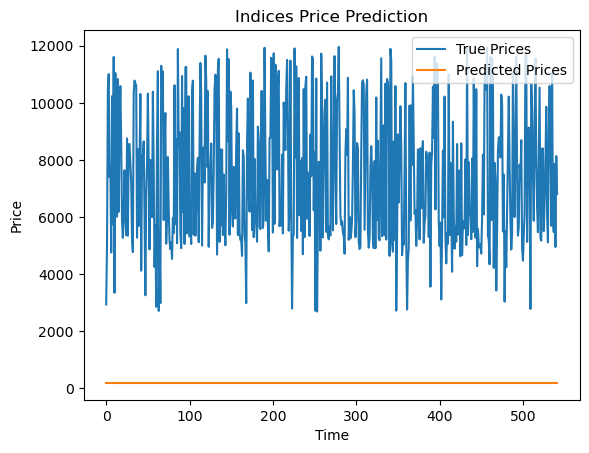

In [126]:
   plt.plot(y_test, label='True Prices')
   plt.plot(predicted_prices, label='Predicted Prices')
   plt.title('Indices Price Prediction')
   plt.xlabel('Time')
   plt.ylabel('Price')
   plt.legend()
   plt.show()
   mo


### Additional Considerations:
- **Feature Selection**: You may want to experiment with different features or technical indicators to improve model performance.
- **Hyperparameter Tuning**: Adjust the model architecture, number of epochs, batch size, and other hyperparameters to optimize performance.
- **Evaluation Metrics**: Consider using metrics like RMSE, MAE, or MAPE to evaluate the model's accuracy.
- **Data Sources**: Ensure your dataset is reliable and contains sufficient historical data for training.

By following these steps, you can create a model to predict indices effectively.

# User
attachment://In a brief sentence, acknowledge you have received the following dataframe information: `DataFrame.dtypes>>> data.dtypes` outputs:

Open float64
High float64
Low float64
Close float64

# Assistant
I acknowledge that the DataFrame contains the following data types: 'Open', 'High', 'Low', and 'Close' are all of type float64.


7. **Train the Model**:
   Fit the model to the training data.

   

In [120]:
   model.fit(X_train, y_train, epochs=50, batch_size=32)
   

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - loss: 61033560.0000
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 59658068.0000
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 59827552.0000
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 59730652.0000
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 61204612.0000
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 59207076.0000
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 59350768.0000
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 59231204.0000
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 60362976.0000
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 58846172.0000
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 58964160.0000
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 58201076.0000
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 59370580.0000
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 

In [132]:
   def create_dataset(data, time_step=1):
       X, y = [], []
       for i in range(len(data) - time_step - 1):
           X.append(data[i:(i + time_step), :])
           y.append(data[i + time_step, 0])  # Assuming we want to predict 'Close' price
       return np.array(X), np.array(y)

   time_step = 10  # Number of time steps
   X, y = create_dataset(data.values, time_step)
   


5. **Split the Data**:
   Split the dataset into training and testing sets.

   

In [135]:
   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
   


6. **Build the LSTM Model**:
   Create and compile the LSTM model.

   

In [138]:
   model = Sequential()
   model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
   model.add(Dropout(0.2))
   model.add(LSTM(50, return_sequences=False))
   model.add(Dropout(0.2))
   model.add(Dense(1))

   model.compile(optimizer='adam', loss='mean_squared_error')
   

C:\Users\prana\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



7. **Train the Model**:
   Fit the model to the training data.

   

In [141]:
   model.fit(X_train, y_train, epochs=50, batch_size=32)
   

Epoch 1/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 60160852.0000
Epoch 2/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 60295376.0000
Epoch 3/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 60751592.0000
Epoch 4/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59636692.0000
Epoch 5/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59441440.0000
Epoch 6/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59981944.0000
Epoch 7/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 60184088.0000
Epoch 8/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 60449720.0000
Epoch 9/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59822176.0000
Epoch 10/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59887220.0000
Epoch 11/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 59895284.0000
Epoch 12/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 59606060.0000
Epoch 13/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 60053680.0000
Epoch 14/50
68/68 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5


8. **Make Predictions**:
   Use the model to predict the indices on the test set.

   

In [144]:
   predicted_prices = model.predict(X_test)
   

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step



9. **Visualize Results**:
   Plot the true vs. predicted prices to evaluate the model's performance.

   

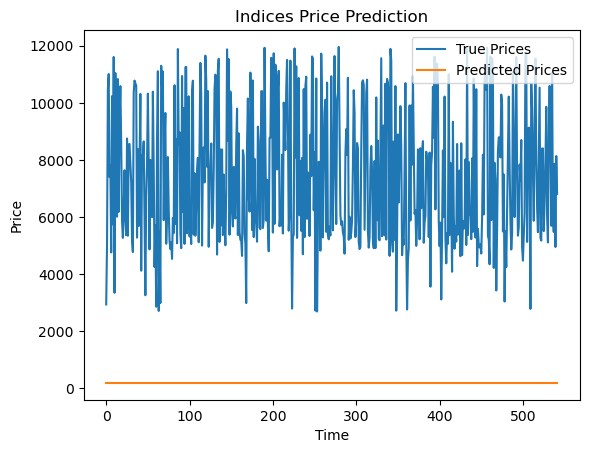

In [147]:
   plt.plot(y_test, label='True Prices')
   plt.plot(predicted_prices, label='Predicted Prices')
   plt.title('Indices Price Prediction')
   plt.xlabel('Time')
   plt.ylabel('Price')
   plt.legend()
   plt.show()
   


### Additional Considerations:
- **Feature Selection**: You may want to experiment with different features or technical indicators to improve model performance.
- **Hyperparameter Tuning**: Adjust the model architecture, number of epochs, batch size, and other hyperparameters to optimize performance.
- **Evaluation Metrics**: Consider using metrics like RMSE, MAE, or MAPE to evaluate the model's accuracy.
- **Data Sources**: Ensure your dataset is reliable and contains sufficient historical data for training.

By following these steps, you can create a model to predict indices effectively.

# User
attachment://In a brief sentence, acknowledge you have received the following dataframe information: `DataFrame.dtypes>>> data.dtypes` outputs:

Open float64
High float64
Low float64
Close float64

# Assistant
I acknowledge that the DataFrame contains the following data types: 'Open', 'High', 'Low', and 'Close' are all of type float64.

In [157]:
import numpy as np
import pandas as pd
import yfinance as yf
from ta import add_all_ta_features
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Data Collection
data = yf.download("^NSEI", start="2010-01-01", end="2023-01-01")

# Step 2: Data Preprocessing
data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")
data.dropna(inplace=True)

# Step 3: Feature Engineering
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])  # all features except the target
        y.append(data[i + time_step, -1])  # target variable
    return np.array(X), np.array(y)

# Normalize the data
data_scaled = (data - data.min()) / (data.max() - data.min())
X, y = create_dataset(data_scaled.values, time_step=60)

# Step 4: Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Step 5: Model Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Step 6: Model Evaluation
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

[*********************100%***********************]  1 of 1 completed
C:\Users\prana\anaconda3\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.

# User
so i want to create a model which use LSTM, RNN, and technical indicator on the indices knows as nifty 50 so please make me an model on that

# Assistant
To create a model that uses LSTM (Long Short-Term Memory) and RNN (Recurrent Neural Network) with technical indicators for the Nifty 50 index, you will need to follow several steps. Below is a detailed outline of the process, including the necessary code.

### Steps to Create the Model

1. **Data Collection**: Obtain historical data for the Nifty 50 index. You can use libraries like `yfinance` or `pandas_datareader` to fetch the data.

2. **Data Preprocessing**: Clean the data, handle missing values, and create technical indicators (like moving averages, RSI, etc.).

3. **Feature Engineering**: Prepare the dataset for the LSTM model by creating sequences of data.

4. **Model Building**: Build the LSTM model using libraries like TensorFlow or Keras.

5. **Model Training**: Train the model on the prepared dataset.

6. **Model Evaluation**: Evaluate the model's performance using appropriate metrics.

### Required Python Packages
You will need the following Python packages:
- `numpy`
- `pandas`
- `yfinance` (for data collection)
- `ta` (for technical indicators)
- `tensorflow` or `keras` (for building the LSTM model)
- `scikit-learn` (for data splitting and evaluation)

### Example Code
Here is a simplified example code that covers the above steps:


In [167]:
import numpy as np
import pandas as pd
import yfinance as yf
from ta import add_all_ta_features
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Data Collection
data = yf.download("^NSEI", start="2010-01-01", end="2023-01-01")

# Step 2: Data Preprocessing
data = add_all_ta_features(data, open="Open", high="High", low="Low", close="Close", volume="Volume")
data.dropna(inplace=True)

# Step 3: Feature Engineering
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), :-1])  # all features except the target
        y.append(data[i + time_step, -1])  # target variable
    return np.array(X), np.array(y)

# Normalize the data
data_scaled = (data - data.min()) / (data.max() - data.min())
X, y = create_dataset(data_scaled.values, time_step=60)

# Step 4: Model Building
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

# Step 5: Model Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

# Step 6: Model Evaluation
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')

[*********************100%***********************]  1 of 1 completed
C:\Users\prana\anaconda3\Lib\site-packages\ta\trend.py:1030: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  self._psar[i] = high2


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.


### Explanation of the Code
- **Data Collection**: The code fetches historical Nifty 50 data using `yfinance`.
- **Data Preprocessing**: It adds technical indicators using the `ta` library and drops any rows with missing values.
- **Feature Engineering**: The `create_dataset` function prepares the data for LSTM by creating sequences.
- **Model Building**: A Sequential LSTM model is built with dropout layers to prevent overfitting.
- **Model Training**: The model is compiled and trained on the training dataset.
- **Model Evaluation**: Finally, the model's performance is evaluated on the test dataset.

Make sure to install the required packages if you haven't already, and adjust the parameters as needed for your specific use case.

# Assistant
The error you're encountering indicates that the dataset is empty when you attempt to split it into training and testing sets. This can happen if the data preprocessing steps result in no data being available for training.

Here are a few potential reasons for this issue:
1. The data downloaded from Yahoo Finance may not contain any rows after applying the technical analysis features and dropping missing values.
2. The `add_all_ta_features` function may not be able to compute features if there are not enough data points.

To fix this error, you should check if the `data` DataFrame is empty after preprocessing. You can add a check before the `train_test_split` to ensure that there is enough data to proceed.

Would you like me to provide the corrected code?

# Assistant
The error you're encountering indicates that the dataset is empty when you attempt to split it into training and testing sets. This can happen if the data preprocessing steps result in no data being available for training.

Here are a few potential reasons for this issue:
1. The data downloaded from Yahoo Finance may not contain any rows after applying the technical analysis features and dropping NaN values.
2. The `add_all_ta_features` function may be adding columns that result in all rows being dropped due to NaN values.

To fix this error, you should check the shape of the `data` after preprocessing and ensure that there are enough samples to split. You can also add a check to ensure that the dataset is not empty before proceeding with the train-test split.

Would you like me to provide the corrected code?